# Data exploration

## Selecting the data

We start by uploading the data and all necessary libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

app_data = pd.read_csv('googleplaystore.csv')

Function below takes in a data frame and returns percentage/number of missing values for each feature(column). It will be used later, to have a better understanding of the data

In [2]:
def missing_values(test):
    total = test.isnull().sum().sort_values(ascending=False)
    percent_1 = test.isnull().sum() / test.isnull().count() * 100
    percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
    
    return missing_data.head((missing_data['Total'] >= 0).sum())

Display the amount of missing values per column and what percentage of the column contains missing values

In [3]:
missing_values(app_data)

,Total,%
Rating,1474,13.6
Current Ver,8,0.1
Android Ver,3,0.0
Content Rating,1,0.0
Type,1,0.0
Last Updated,0,0.0
Genres,0,0.0
Price,0,0.0
Installs,0,0.0
Size,0,0.0


Counting unique values in "App" column we see that there are duplicates

In [4]:
unique_apps = app_data["App"].nunique()
all_apps = app_data["App"].size

f"total app count: {all_apps}, unique app count: {unique_apps}"

'total app count: 10841, unique app count: 9660'

Removing duplicates in "App" column

In [5]:
app_data = app_data.drop_duplicates(subset = "App")

new_all_apps = app_data["App"].size
f"total app count after dropping duplicates: {new_all_apps}"

'total app count after dropping duplicates: 9660'

In [6]:
#See all unique values in the Android version column
app_data["Android Ver"].unique()
# Note that most are num and up. Hence, we can split the column into 3 by space

#Take the first part of the android version
app_data["Android Ver"] = app_data["Android Ver"].str.split(expand = True)

In [7]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

We remove the features that are normally not available when the app is about to launch.

In [8]:
not_available_cols = ['Reviews', 'Installs', 'Last Updated', 'Current Ver']
app_data = app_data.drop(not_available_cols, axis = 1)
app_data.head()

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,Free,0,Everyone,Art & Design,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,Free,0,Everyone,Art & Design;Pretend Play,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,Free,0,Everyone,Art & Design,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,Free,0,Teen,Art & Design,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,Free,0,Everyone,Art & Design;Creativity,4.4


In [9]:
missing_values(app_data)

,Total,%
Rating,1463,15.1
Android Ver,3,0.0
Content Rating,1,0.0
Type,1,0.0
Genres,0,0.0
Price,0,0.0
Size,0,0.0
Category,0,0.0
App,0,0.0


In [10]:
app_data[(app_data["Content Rating"].isnull() | app_data["Android Ver"].isnull())]

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,11M,Paid,$1.49,Everyone,Personalization,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,2.1M,Free,0,Everyone,Personalization,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,"1,000+",0,Everyone,NaN,"February 11, 2018",NaN


Since the number of missing values in the android ver column is small and it intersects with the single missing value in Content rating, we will delete those rows

In [11]:
inds = app_data[(app_data["Content Rating"].isnull() | app_data["Android Ver"].isnull())].index
#Since the only missing values are in Android version and Content rating, we can use dropna
app_data = app_data.dropna()
app_data.head()

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,19M,Free,0,Everyone,Art & Design,4.0.3
1,Coloring book moana,ART_AND_DESIGN,3.9,14M,Free,0,Everyone,Art & Design;Pretend Play,4.0.3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,8.7M,Free,0,Everyone,Art & Design,4.0.3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,25M,Free,0,Teen,Art & Design,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.8M,Free,0,Everyone,Art & Design;Creativity,4.4


## Converting the data into workable shape

We will be starting by using LabelEncoding on "Type" column. As there are only 2 categories and no Nan values as they were removed with when we removed rows with many missing values earlier. 

In [12]:
# Change price column to free = 0 and paid = 1
# creating instance of labelencoder
paid_types = app_data["Type"].unique()
labelencoder = LabelEncoder()
app_data['Type'] = labelencoder.fit_transform(app_data['Type'])

Now, we deal with the "Price" column. Note that here, the data is already mostly numerical, so we will only remove the dollar sign

In [13]:
before = app_data["Price"].nunique()
app_data["Price"] = app_data["Price"].replace('[\$,]', '', regex=True).astype(float)
after = app_data["Price"].nunique()
f"Unique values before: {before}, unique values after: {after}"

'Unique values before: 73, unique values after: 73'

Then, "Content Rating". First, check all categories in this column

In [14]:
app_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

First, as we can't assign a specific order to "Unrated", we will see how many rows have that value. If there are very few, we will use SimpleImputer to change change the value to the most common one

In [15]:
app_data[(app_data["Content Rating"] == "Unrated")]

,App,Category,Rating,Size,Type,Price,Content Rating,Genres,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,6.4M,0,0.0,Unrated,Tools,2.3.3


In [16]:
imp_const = SimpleImputer(missing_values="Unrated", strategy = "most_frequent")
imp_const.fit(pd.DataFrame(app_data["Content Rating"]))
app_data["Content Rating"] = imp_const.transform(pd.DataFrame(app_data["Content Rating"]))

In [17]:
app_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

As the values in the "Content Rating" column can be ordered, we will be assigning a numerical value to each category. however, we will not be using LabelEncoder as is encodes in alphabetical order. Instead, we will create the an array of values we would like to replace and an array that we will replace with. Then, we iterate through both sets and replace on by one. 

In [18]:
unique_cr = np.array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+'])
n = np.array([0, 10, 13, 17, 18])
for i,j in zip(unique_cr, n):
    app_data["Content Rating"] = app_data["Content Rating"].replace([i,], j)
unq = app_data["Content Rating"].unique()
f"Unique values in converted \"Content Rating\": {unq}"

'Unique values in converted "Content Rating": [ 0 13 10 17 18]'

In [19]:
app_data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Then, we work with "Size"

In [20]:
app_data["Size"].unique()[1:30]

array(['14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M'], dtype=object)

Note that here, I am only showing the first 30 values because it would not look pretty to display all of them. I have looked at the full array and there are 3 types of values: "...M", "...k", and "Varies with device". I am assuming that M are megabytes and k are kilobytes. Hence, we will have to divide values with k by 1024 to have all values in the same units. Also, we will replace "Varies with device" by Nan so we can convert cells with numerical data propertly

In [21]:
def clean_size(size):
    if size[-1:] == "M":
        clean_size = 1000000*float(size[:-1])
    elif size[-1:] == "k":
        clean_size = 1000*float(size[:-1])
    else:
        clean_size = None
    return clean_size

app_data["Size"] = app_data["Size"].map(clean_size)

In [22]:
'''
size = pd.DataFrame()
size["size_code"] = app_data['Size'].str[-1:]
size["size_number"] = app_data['Size'].str[0:-1]
size["size_number"] = size["size_number"].replace('Varies with devic',np.nan)
size["size_number"] = pd.to_numeric(size["size_number"], downcast = "float")
conditions = [ (size["size_code"] == 'k'), (size["size_code"] == 'M'), (size["size_code"] == "e")]
choices = [size["size_number"]/1024, size["size_number"], np.nan]
app_data["Size"] = np.select(conditions, choices, default='np.nan')
'''
app_data["Size"].unique()[0:30]


array([19000000., 14000000.,  8700000., 25000000.,  2800000.,  5600000.,
       29000000., 33000000.,  3100000., 28000000., 12000000., 20000000.,
       21000000., 37000000.,  2700000.,  5500000., 17000000., 39000000.,
       31000000.,  4200000., 23000000.,  6000000.,  6100000.,  4600000.,
        9200000.,  5200000., 11000000., 24000000.,       nan,  9400000.])

Then, we replace Nan values with mean and we add an extra column that will have 1 if the the original value in "Size" was "Varies with device" and 0 if it was an assigned value

In [23]:

#app_data["Size: Varies with device"] = (pd.get_dummies(app_data["Size"]))["nan"]
imp_size = SimpleImputer(missing_values= np.nan ,strategy = "mean")
imp_size.fit(pd.DataFrame(app_data["Size"]))
app_data["Size"] = (imp_size.transform(pd.DataFrame(app_data["Size"])))
app_data["Size"].unique()[0:30]

array([19000000.       , 14000000.       ,  8700000.       ,
       25000000.       ,  2800000.       ,  5600000.       ,
       29000000.       , 33000000.       ,  3100000.       ,
       28000000.       , 12000000.       , 20000000.       ,
       21000000.       , 37000000.       ,  2700000.       ,
        5500000.       , 17000000.       , 39000000.       ,
       31000000.       ,  4200000.       , 23000000.       ,
        6000000.       ,  6100000.       ,  4600000.       ,
        9200000.       ,  5200000.       , 11000000.       ,
       24000000.       , 21758755.9430605,  9400000.       ])

In [24]:
app_data.dtypes

App                object
Category           object
Rating            float64
Size              float64
Type                int32
Price             float64
Content Rating      int64
Genres             object
Android Ver        object
dtype: object

Now, we will work with Category. As there are 33 categories, using onehot encoder would create a lot of extra columns. Hence, we will use labelencoder. As the data not ordered naurally, we will assign the highest value to the most common category and lowest to the least common

In [25]:
app_data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [26]:
n = app_data["Category"].unique()
c = []
for i in n:
    c.append([app_data[(app_data["Category"] == i)]["Category"].count(), i])
c.sort()

r = range(33)

for i,j in zip(c, r):
    app_data["Category"] = (app_data["Category"].replace(i[1], j, regex=True))

app_data["Category"] = app_data["Category"].astype("int")

Finally, we will look at "Genres" and decide what we should do with that column as it has many values similar to Category

In [27]:
app_data["Genres"].unique()[0:30]

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play'], dtype=object)

In [28]:
app_data[["Genre1", "Genre2"]] = app_data["Genres"].str.split(";", expand = True)
app_data = app_data.drop(["Genres"], axis=1)

In [29]:
app_data["Genre2"].unique()

array([None, 'Pretend Play', 'Creativity', 'Education', 'Music & Video',
       'Action & Adventure', 'Brain Games'], dtype=object)

We see that many values in the Genres column are the same as in Category. Since we might get 2 highly correlated columns, we should only keep one of them. We will be keeping Category as the data there is better organised. 

In [30]:
app_data = app_data.drop(["Genre1", "Genre2"], axis=1)

Now, that all the data is numerical, we can separate it into x and y sets

We also remove the Android Ver Column

In [31]:
app_data = app_data.drop(['Android Ver'], axis=1) 

In [32]:
# Create df for Rating
# the y df
app_data_y = pd.to_numeric(app_data["Rating"], downcast = "float")
app_data_y.head()

# Create df for the Rest of the features
# the x df
app_data_x = app_data.drop(["Rating"], axis = 1)
app_data_x.head(20)

,App,Category,Size,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,19000000.0,0,0.0,0
1,Coloring book moana,4,14000000.0,0,0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4,8700000.0,0,0.0,0
3,Sketch - Draw & Paint,4,25000000.0,0,0.0,13
4,Pixel Draw - Number Art Coloring Book,4,2800000.0,0,0.0,0
5,Paper flowers instructions,4,5600000.0,0,0.0,0
6,Smoke Effect Photo Maker - Smoke Editor,4,19000000.0,0,0.0,0
7,Infinite Painter,4,29000000.0,0,0.0,0
8,Garden Coloring Book,4,33000000.0,0,0.0,0
9,Kids Paint Free - Drawing Fun,4,3100000.0,0,0.0,0


## Data visualisation

We will see the trends in Category by first seeing how many apps there are in each category

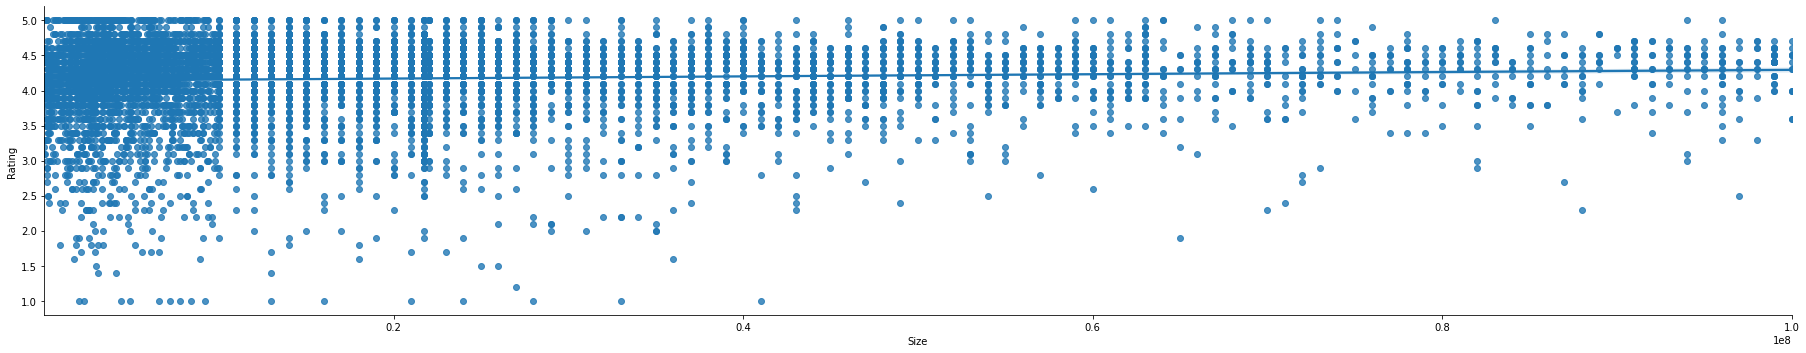

In [33]:
sns.lmplot(data=app_data, x="Size", y="Rating", height=5, aspect=5)

<AxesSubplot:xlabel='Category', ylabel='Rating'>

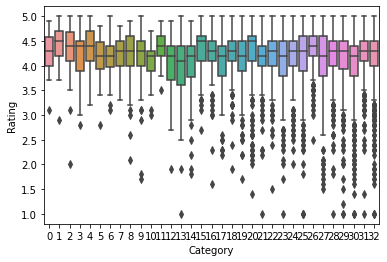

In [34]:
sns.boxplot(data=app_data, x="Category", y="Rating")